In [1]:
import pandas as pd
import numpy as np

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [10]:
data = pd.read_csv('labeled.csv', sep = ';')
data.head()

,"comment,toxic"
0,"Верблюдов-то за что? Дебилы, бл...\n,1.0"
1,"Хохлы, это отдушина затюканого россиянина, мол..."
2,"Собаке - собачья смерть\n,1.0"
3,"Страницу обнови, дебил. Это тоже не оскорблени..."
4,"тебя не убедил 6-страничный пдф в том, что Скр..."


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('C:/Users/vtako/Desktop/Project/Homework9 ML/winequality-red.csv', sep=';')

# Вывод первых строк для проверки
print(data.head())

# Определяем целевую переменную (колонка 'quality')
X = data.drop('quality', axis=1)
y = data['quality']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки: ", X_train.shape)
print("Размер тестовой выборки: ", X_test.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
# Импортируем необходимые библиотеки
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_dt)

# BaggingClassifier со 100 деревьями
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=RANDOM_STATE)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
acc_Bagging = accuracy_score(y_test, y_pred_bagging)

# RandomForestClassifier со 100 деревьями
rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred_rf)

# Записываем результаты в DataFrame
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

# Выводим результаты
print(results)

# Выводим точность каждого классификатора
print(f"Точность DecisionTreeClassifier: {acc_DT:.4f}")
print(f"Точность BaggingClassifier: {acc_Bagging:.4f}")
print(f"Точность RandomForestClassifier: {acc_RF:.4f}")


                    model   task  accuracy
0  DecisionTreeClassifier  task2  0.572917
1       BaggingClassifier  task2  0.641667
2  RandomForestClassifier  task2  0.654167
Точность DecisionTreeClassifier: 0.5729
Точность BaggingClassifier: 0.6417
Точность RandomForestClassifier: 0.6542


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



Количество деревьев: 10, Точность: 0.6333
Количество деревьев: 50, Точность: 0.6521
Количество деревьев: 100, Точность: 0.6542
Количество деревьев: 200, Точность: 0.6646
Количество деревьев: 400, Точность: 0.6625
Количество деревьев: 600, Точность: 0.6646
Количество деревьев: 800, Точность: 0.6646
Количество деревьев: 1000, Точность: 0.6646
Количество деревьев: 1200, Точность: 0.6604
Количество деревьев: 1400, Точность: 0.6646
Количество деревьев: 1600, Точность: 0.6604
Количество деревьев: 1800, Точность: 0.6625
Количество деревьев: 2000, Точность: 0.6687
Количество деревьев: 2200, Точность: 0.6687
Количество деревьев: 2400, Точность: 0.6687
Количество деревьев: 2600, Точность: 0.6667
Количество деревьев: 2800, Точность: 0.6687
Количество деревьев: 3000, Точность: 0.6708
Количество деревьев: 3200, Точность: 0.6687
Количество деревьев: 3400, Точность: 0.6646
Количество деревьев: 3600, Точность: 0.6646
Количество деревьев: 3800, Точность: 0.6687
Количество деревьев: 4000, Точность: 0.66

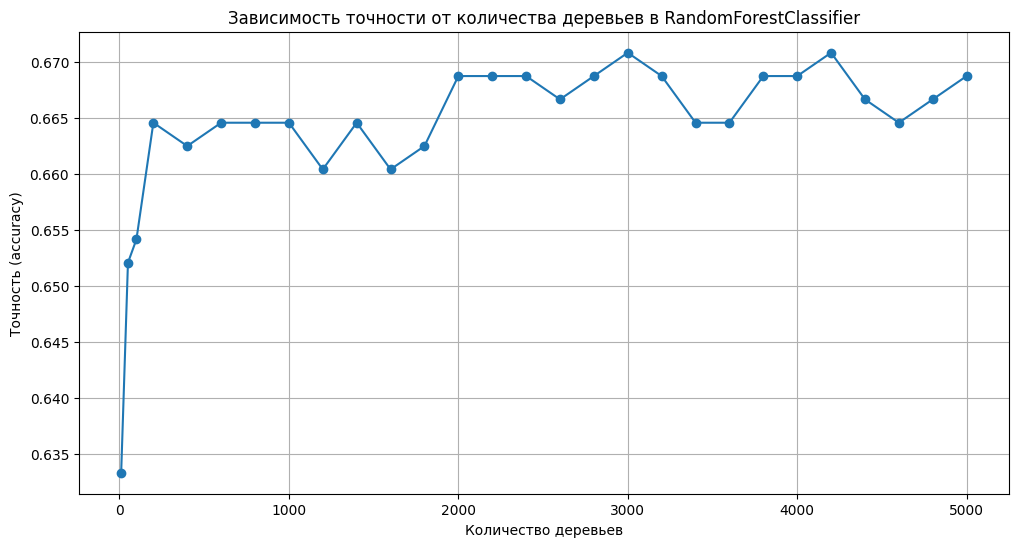

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Задаем список количества деревьев
n_estimators_list = [10, 50, 100, 200] + list(range(400, 5001, 200))

# Списки для хранения результатов
accuracy_list = []

for n_estimators in n_estimators_list:
    # Создаем и обучаем модель
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE)
    rf_clf.fit(X_train, y_train)
    
    # Предсказание и оценка точности
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Записываем результат в DataFrame
    results.loc[len(results)] = ['RandomForestClassifier', f'task3_{n_estimators}', accuracy]
    
    # Выводим промежуточные результаты
    print(f"Количество деревьев: {n_estimators}, Точность: {accuracy:.4f}")

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_list, accuracy_list, marker='o')
plt.title('Зависимость точности от количества деревьев в RandomForestClassifier')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность (accuracy)')
plt.grid(True)
plt.show()


4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Глобальная настройка случайного состояния
RANDOM_STATE = 42

# Загрузка данных
data = pd.read_csv('C:/Users/vtako/Desktop/Project/Homework9 ML/winequality-red.csv', sep=';')

# Разделение данных на признаки и целевую переменную
X = data.drop('quality', axis=1)
y = data['quality']

# Преобразуем метки целевой переменной, чтобы они начинались с 0 для XGBoost
y_adjusted = y - y.min()

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X, y_adjusted, test_size=0.3, random_state=RANDOM_STATE)

# Обучение GradientBoostingClassifier из sklearn
gb_clf_sklearn = GradientBoostingClassifier(random_state=RANDOM_STATE)
acc_sklearn = cross_val_score(gb_clf_sklearn, X_train, y_train, cv=5, scoring='accuracy').mean()

# Обучение XGBClassifier из xgboost
gb_clf_xgboost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=RANDOM_STATE)
acc_xgboost = cross_val_score(gb_clf_xgboost, X_train_adj, y_train_adj, cv=5, scoring='accuracy').mean()

# Создаем DataFrame для записи результатов
results = pd.DataFrame(columns=['model', 'task', 'accuracy'])

# Записываем результаты в DataFrame
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

# Вывод результатов
print(f"Точность модели GradientBoostingClassifier (sklearn): {acc_sklearn:.4f}")
print(f"Точность модели XGBClassifier (xgboost): {acc_xgboost:.4f}")


C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:38:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Точность модели GradientBoostingClassifier (sklearn): 0.6426
Точность модели XGBClassifier (xgboost): 0.6497


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Задаем параметры для подбора для GradientBoostingClassifier
param_grid_sklearn = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Задаем параметры для подбора для XGBClassifier
param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Приведение меток классов к диапазону от 0 до 5 с помощью LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# GridSearchCV для GradientBoostingClassifier (sklearn)
gb_clf_sklearn = GradientBoostingClassifier(random_state=RANDOM_STATE)
grid_search_sklearn = GridSearchCV(gb_clf_sklearn, param_grid_sklearn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_sklearn.fit(X_train, y_train_encoded)

# GridSearchCV для XGBClassifier (xgboost)
gb_clf_xgboost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=RANDOM_STATE)
grid_search_xgboost = GridSearchCV(gb_clf_xgboost, param_grid_xgboost, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgboost.fit(X_train, y_train_encoded)

# Лучшая модель и параметры для sklearn
best_params_sklearn = grid_search_sklearn.best_params_
acc_sklearn_cv = grid_search_sklearn.best_score_

# Лучшая модель и параметры для xgboost
best_params_xgboost = grid_search_xgboost.best_params_
acc_xgboost_cv = grid_search_xgboost.best_score_

# Записываем результаты в DataFrame
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

# Выводим результаты
print(f"Параметры лучшей модели sklearn:\n{best_params_sklearn}")
print(f"Точность на кросс-валидации для GradientBoostingClassifier: {acc_sklearn_cv:.4f}")

print(f"Параметры лучшей модели xgboost:\n{best_params_xgboost}")
print(f"Точность на кросс-валидации для XGBClassifier: {acc_xgboost_cv:.4f}")


C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:40:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Параметры лучшей модели sklearn:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Точность на кросс-валидации для GradientBoostingClassifier: 0.6479
Параметры лучшей модели xgboost:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Точность на кросс-валидации для XGBClassifier: 0.6416


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [9]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Проверяем версии numpy и catboost для устранения проблем совместимости
import numpy as np
import catboost as cb
print(f"numpy version: {np.__version__}")
print(f"catboost version: {cb.__version__}")

# Обучение LGBMClassifier (LightGBM)
lgbm_clf = LGBMClassifier(random_state=RANDOM_STATE)
acc_lightgbm = cross_val_score(lgbm_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

# Обучение CatBoostClassifier
catboost_clf = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
acc_catboost = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

# Записываем результаты в DataFrame
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

# Выводим результаты
print(results)

# Выводим точность каждой модели
print(f"Точность LGBMClassifier (LightGBM): {acc_lightgbm:.4f}")
print(f"Точность CatBoostClassifier (CatBoost): {acc_catboost:.4f}")


numpy version: 1.26.4
catboost version: 1.2.7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [10]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Параметры для подбора для LGBMClassifier (LightGBM)
param_grid_lightgbm = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Параметры для подбора для CatBoostClassifier (CatBoost)
param_grid_catboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# GridSearchCV для LGBMClassifier
lgbm_clf = LGBMClassifier(random_state=RANDOM_STATE)
grid_search_lightgbm = GridSearchCV(lgbm_clf, param_grid_lightgbm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lightgbm.fit(X_train, y_train)

# GridSearchCV для CatBoostClassifier
catboost_clf = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
grid_search_catboost = GridSearchCV(catboost_clf, param_grid_catboost, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)

# Лучшая модель и параметры для LightGBM
best_params_lightgbm = grid_search_lightgbm.best_params_
acc_lightgbm_cv = grid_search_lightgbm.best_score_

# Лучшая модель и параметры для CatBoost
best_params_catboost = grid_search_catboost.best_params_
acc_catboost_cv = grid_search_catboost.best_score_

# Записываем результаты в DataFrame
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

# Выводим лучшие параметры и точности
print(f"Параметры лучшей модели lightgbm:\n{best_params_lightgbm}")
print(f"Точность на кросс-валидации для LGBMClassifier: {acc_lightgbm_cv:.4f}")

print(f"Параметры лучшей модели catboost:\n{best_params_catboost}")
print(f"Точность на кросс-валидации для CatBoostClassifier: {acc_catboost_cv:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 1119, number of used features: 11
[LightGBM] [Info] Start training from score -4.822966
[LightGBM] [Info] Start training from score -3.436672
[LightGBM] [Info] Start training from score -0.833982
[LightGBM] [Info] Start training from score -0.937972
[LightGBM] [Info] Start training from score -2.092937
[LightGBM] [Info] Start training from score -4.535284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [12]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Преобразование меток в диапазон, начинающийся с 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Функция для минимизации с помощью Optuna
def objective(trial):
    # Оптимизируем параметры
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eval_metric': 'mlogloss',  # Отключение предупреждений в xgboost
        'use_label_encoder': False,
        'random_state': RANDOM_STATE
    }

    # Обучение модели
    model = XGBClassifier(**param)
    
    # Кросс-валидация
    score = cross_val_score(model, X_train, y_train_encoded, cv=3, scoring='accuracy')
    
    # Возвращаем среднюю точность
    return score.mean()

# Создаем исследование с Optuna для минимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Можно изменить количество попыток

# Лучшая комбинация параметров
best_params_xgboost_optuna = study.best_params

# Лучшая точность
acc_xgboost_optuna = study.best_value

# Записываем результат в DataFrame
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

# Выводим лучшие параметры и точность
print(f"Параметры лучшей модели xgboost через optuna:\n{best_params_xgboost_optuna}")
print(f"Точность на кросс-валидации для XGBClassifier через optuna: {acc_xgboost_optuna:.4f}")


[I 2024-09-16 20:45:19,468] A new study created in memory with name: no-name-97f8fe7c-1611-43ad-9bcc-2d251ef75733
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-g

Параметры лучшей модели xgboost через optuna:
{'learning_rate': 0.06255967221363751, 'n_estimators': 438, 'max_depth': 4}
Точность на кросс-валидации для XGBClassifier через optuna: 0.6488


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Создаем базовые модели для стэкинга
estimators = [
    ('gb', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('xgb', XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', LGBMClassifier(random_state=RANDOM_STATE)),
    ('catboost', CatBoostClassifier(random_state=RANDOM_STATE, verbose=0))
]

# Создаем стэкинг-классификатор
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(), cv=3)

# Оценка модели через кросс-валидацию
acc_stacking_default = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

# Записываем результат в DataFrame
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

# Выводим результат
print(f"Точность стэкинга на кросс-валидации: {acc_stacking_default:.4f}")


C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -5.003946
[LightGBM] [Info] Start training from score -3.445802
[LightGBM] [Info] Start training from score -0.833413
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.099781
[LightGBM] [Info] Start training from score -4.444331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.717382
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.599599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -4.780803
[LightGBM] [Info] Start training from score -3.445802
[LightGBM] [Info] Start training from score -0.833413
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.099781
[LightGBM] [Info] Start training from score -4.598481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.936037
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.599599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -4.780803
[LightGBM] [Info] Start training from score -3.445802
[LightGBM] [Info] Start training from score -0.833413
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.099781
[LightGBM] [Info] Start training from score -4.598481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.464619
[LightGBM] [Info] Start training from score -0.835818
[LightGBM] [Info] Start training from score -0.936037
[LightGBM] [Info] Start training from score -2.087294
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -4.780803
[LightGBM] [Info] Start training from score -3.499869
[LightGBM] [Info] Start training from score -0.837281
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.086176
[LightGBM] [Info] Start training from score -4.444331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 11
[LightGBM] [Info] Start training from score -4.852030
[LightGBM] [Info] Start training from score -3.430645
[LightGBM] [Info] Start training from score -0.834361
[LightGBM] [Info] Start training from score -0.940007
[LightGBM] [Info] Start training from score -2.088410
[LightGBM] [Info] Start training from score -4.495355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 597, number of used features: 11
[LightGBM] [Info] Start training from score -4.782479
[LightGBM] [Info] Start training from score -3.447478
[LightGBM] [Info] Start training from score -0.835089
[LightGBM] [Info] Start training from score -0.940879
[LightGBM] [Info] Start training from score -2.087852
[LightGBM] [Info] Start training from score -4.446007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Оптимальные параметры, найденные ранее для каждой модели
optimal_params_gb = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5}  # пример для GradientBoostingClassifier
optimal_params_xgb = best_params_xgboost_optuna  # Оптимальные параметры, найденные через Optuna
optimal_params_lgbm = best_params_lightgbm  # Оптимальные параметры для LGBMClassifier
optimal_params_catboost = best_params_catboost  # Оптимальные параметры для CatBoostClassifier

# Создаем базовые модели для стэкинга с оптимальными параметрами
estimators = [
    ('gb', GradientBoostingClassifier(**optimal_params_gb, random_state=RANDOM_STATE)),
    ('xgb', XGBClassifier(**optimal_params_xgb, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', LGBMClassifier(**optimal_params_lgbm, random_state=RANDOM_STATE)),
    ('catboost', CatBoostClassifier(**optimal_params_catboost, random_state=RANDOM_STATE, verbose=0))
]

# Создаем стэкинг-классификатор с оптимальными параметрами
stacking_clf_opt = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(), cv=3)

# Оценка модели через кросс-валидацию
acc_stacking = cross_val_score(stacking_clf_opt, X_train, y_train, cv=5, scoring='accuracy').mean()

# Записываем результат в DataFrame
results.loc[13] = ['Stacking', 'task10', acc_stacking]

# Выводим результат
print(f"Точность стэкинга с оптимальными параметрами на кросс-валидации: {acc_stacking:.4f}")


C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -5.003946
[LightGBM] [Info] Start training from score -3.445802
[LightGBM] [Info] Start training from score -0.833413
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.099781
[LightGBM] [Info] Start training from score -4.444331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.717382
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.938891
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.599599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -4.780803
[LightGBM] [Info] Start training from score -3.445802
[LightGBM] [Info] Start training from score -0.833413
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.099781
[LightGBM] [Info] Start training from score -4.598481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.429528
[LightGBM] [Info] Start training from score -0.833244
[LightGBM] [Info] Start training from score -0.936037
[LightGBM] [Info] Start training from score -2.096343
[LightGBM] [Info] Start training from score -4.599599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -4.780803
[LightGBM] [Info] Start training from score -3.445802
[LightGBM] [Info] Start training from score -0.833413
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.099781
[LightGBM] [Info] Start training from score -4.598481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 11
[LightGBM] [Info] Start training from score -4.850914
[LightGBM] [Info] Start training from score -3.464619
[LightGBM] [Info] Start training from score -0.835818
[LightGBM] [Info] Start training from score -0.936037
[LightGBM] [Info] Start training from score -2.087294
[LightGBM] [Info] Start training from score -4.494239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] Start training from score -4.780803
[LightGBM] [Info] Start training from score -3.499869
[LightGBM] [Info] Start training from score -0.837281
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -2.086176
[LightGBM] [Info] Start training from score -4.444331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\vtako\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 11
[LightGBM] [Info] Start training from score -4.852030
[LightGBM] [Info] Start training from score -3.430645
[LightGBM] [Info] Start training from score -0.834361
[LightGBM] [Info] Start training from score -0.940007
[LightGBM] [Info] Start training from score -2.088410
[LightGBM] [Info] Start training from score -4.495355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
results